In [65]:
import seaborn as sns
import os, sys, itertools
import os.path as path
import pandas as pd
import NMUtility
import matplotlib.pyplot as plt
sns.set(style="white")#, font_scale=1.0)
sns.set_style({'axes.labelsize':13,'axes.titlesize':14,'xtick.labelsize':12, 'ytick.labelsize':12})
%matplotlib inline

In [66]:
#from http://stackoverflow.com/questions/11367736/matplotlib-consistent-font-using-latex
import matplotlib
#sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist]) #see list of avail. fonts

font = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = font
matplotlib.rcParams['mathtext.it'] = font+':italic'
matplotlib.rcParams['mathtext.bf'] = font+':bold'
matplotlib.rcParams['mathtext.default'] = 'regular'
#matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$') #example

In [69]:
directory = '/Users/morganfine-morris/Documents/Repos/NMProject/Paper/Data and Analysis/short TB Yan/BASS Output'
plot_dir = "/Users/morganfine-morris/Documents/Repos/NMProject/Paper/Data and Analysis/long TB Yan/plots"
files = [x for x in os.listdir(directory) if 'csv' in x]
print os.path.isdir(directory)
files

True


['TB_all_gnap_eL.csv_Bursts_Results.csv',
 'TB_all_gnap_eL.csv_Bursts_Results_Summary.csv',
 'TB_all_gnap_eL.csv_Peak_Results.csv',
 'TB_all_gnap_eL.csv_Peaks_Results_Summary.csv',
 'TB_all_gnap_eL.csv_Settings_2015_04_22__15_57_06.csv',
 'Yan_all_gnap_eL.csv_Bursts_Results.csv',
 'Yan_all_gnap_eL.csv_Bursts_Results_Summary.csv',
 'Yan_all_gnap_eL.csv_Peak_Results.csv',
 'Yan_all_gnap_eL.csv_Peaks_Results_Summary.csv',
 'Yan_all_gnap_eL.csv_Settings_2015_04_23__16_08_47.csv']

In [73]:
burst_res = [i for i in files if ('Bursts_Results' in i and 'Summary' not in i)]
csv_t,csv_y = burst_res
print burst_res

fullpath_y = os.path.join(directory, csv_y)
fullpath_t = os.path.join(directory, csv_t)
print fullpath_y, '\n',fullpath_t
print
table_y = pd.DataFrame.from_csv(fullpath_y)
table_t= pd.DataFrame.from_csv(fullpath_t)

paramsets = set(table_y.index|table_t.index)
print paramsets
#table_t = table_t.drop(['Unnamed: 1','Attack','Decay','Peak Time',
#'Peak Amp','Edge Event','Burst Start', 'Burst End'],axis=1)
#table_y = table_y.drop(['Unnamed: 1','Attack','Decay','Peak Time',
#'Peak Amp','Edge Event','Burst Start', 'Burst End'],axis=1)

['TB_all_gnap_eL.csv_Bursts_Results.csv', 'Yan_all_gnap_eL.csv_Bursts_Results.csv']
/Users/morganfine-morris/Documents/Repos/NMProject/Paper/Data and Analysis/short TB Yan/BASS Output/Yan_all_gnap_eL.csv_Bursts_Results.csv 
/Users/morganfine-morris/Documents/Repos/NMProject/Paper/Data and Analysis/short TB Yan/BASS Output/TB_all_gnap_eL.csv_Bursts_Results.csv

set(['eL-65.0 gnaps4.2', 'eL-50.0 gnaps2.4', 'eL-65.0 gnaps3.0', 'eL-60.0 gnaps1.8', 'eL-55.0 gnaps1.8', 'eL-60.0 gnaps3.0', 'eL-60.0 gnaps4.2', 'eL-55.0 gnaps4.2', 'eL-60.0 gnaps2.4', 'eL-60.0 gnaps3.6', 'eL-65.0 gnaps1.8', 'eL-65.0 gnaps2.4', 'eL-50.0 gnaps1.8', 'eL-55.0 gnaps3.6', 'eL-55.0 gnaps3.0', 'eL-55.0 gnaps2.4', 'eL-65.0 gnaps3.6'])


In [119]:
def split_param_sets(table, regex_str="([a-zA-Z]+)([\-][\d+.\d+]+|[\d+.\d+]+)", remove = []):
    import re
    def for_each_cell(cell,param_num=1,remove=[]):
        p1, p2 = cell.split(' ')
        for i in remove:
            try:
                p1 = p1.replace(remove,"")
                p2 = p2.replace(remove,"")
            except:
                pass
        
        r = re.compile(regex_str)
        name_1, val_1 = r.match(p1).groups()
        name_2, val_2 = r.match(p2).groups()
        #print name_1, val_1
        if param_num == 1:
            return float(val_1)
        else:
            return str(val_2)

    try:
        ps_col = table['Parameter Set']
        table.drop('Parameter Set',axis=1, inplace=True)
    except KeyError:
        ps_col = pd.Series(table.index.values, table.index.values)
    
    el_col = ps_col.apply(for_each_cell)
    gnap_col = ps_col.apply(for_each_cell, args=(2,))

    table['eL'] = pd.Series(el_col)
    table['gnap'] = pd.Series(gnap_col)
 
    return table

table_y = split_param_sets(table_y)
table_t = split_param_sets(table_t)
print table_t.head(3)
keys = table_t.columns.values[0:5]
list(enumerate(keys))

                  Burst Duration  Interburst Interval  Total Cycle Time  \
eL-50.0 gnaps1.8        5.513902               1.0138          6.527702   
eL-50.0 gnaps1.8        2.564601               1.1615          3.726101   
eL-50.0 gnaps1.8        2.564801               1.1639          3.728701   

                  Peaks per Burst  Intraburst Frequency Model  eL gnap  
eL-50.0 gnaps1.8              179             32.463400    TB -50  1.8  
eL-50.0 gnaps1.8               65             25.345075    TB -50  1.8  
eL-50.0 gnaps1.8               65             25.343098    TB -50  1.8  


[(0, 'Burst Duration'),
 (1, 'Interburst Interval'),
 (2, 'Total Cycle Time'),
 (3, 'Peaks per Burst'),
 (4, 'Intraburst Frequency')]

In [121]:
key = keys[0]

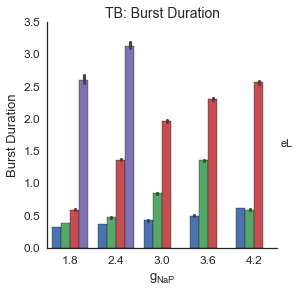

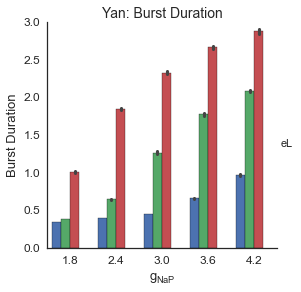

In [123]:
ho= [float(i) for i in ['-65.0','-60.0','-55.0','-50.0']]

facets = sns.factorplot("gnap", key, "eL", table_t, kind="bar",legend=True, legend_out=True, 
                        size=4, hue_order = ho)#, aspect=.8)
#plt.legend(loc=1,title="eL")
plt.xlabel(r'$g_{NaP}$')
plt.title("TB: "+key)
facets = sns.factorplot("gnap", key, "eL", table_y, kind="bar",legend=True, legend_out=True,
                        size=4, hue_order = ho)#, aspect=.8)
#plt.legend(loc=1,title="eL")
plt.xlabel(r'$g_{NaP}$')
plt.title("Yan: "+key)
plt.show()

In [10]:
yan_mean = table_y.groupby(['eL','gnap']).mean()
tb_mean = table_t.groupby(['eL','gnap']).mean()
unstacked_yan = yan_mean.unstack()[key].fillna(0.0)
unstacked_tb = tb_mean.unstack()[key].fillna(0.0)
vmax = max(unstacked_tb.values.max(), unstacked_yan.values.max())
unstacked_yan.loc['-50.0'] = 0
unstacked_yan = unstacked_yan.sort()

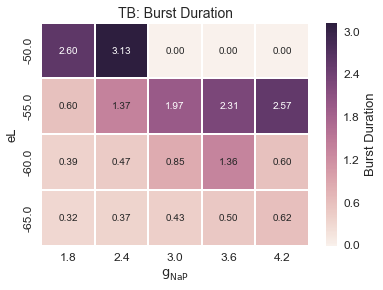

In [21]:
heatmap = sns.heatmap(unstacked_tb, annot=True, fmt=".2f",vmin=0, vmax=vmax, 
                      annot_kws={'fontsize':10}, cbar_kws={'label':key})

heatmap.set_xlabel(r'$\mathrm{g_{NaP}}$')
heatmap.set_title("TB: "+key)
hm_filename = "tb_heatmap_{}.pdf".format(key.replace(" ","_"))
plt.savefig(path.join(plot_dir,hm_filename))

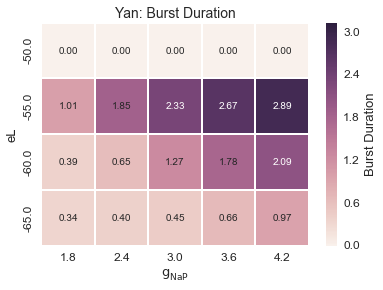

In [22]:
heatmap = sns.heatmap(unstacked_yan, annot=True, fmt=".2f", vmin=0, vmax=vmax,
                      annot_kws={'fontsize':10}, cbar_kws={'label':key})

heatmap.set_xlabel(r'$\mathrm{g_{NaP}}$')
heatmap.set_title("Yan: "+key)
hm_filename = "yan_heatmap_{}.pdf".format(key.replace(" ","_"))
plt.savefig(path.join(plot_dir,hm_filename))

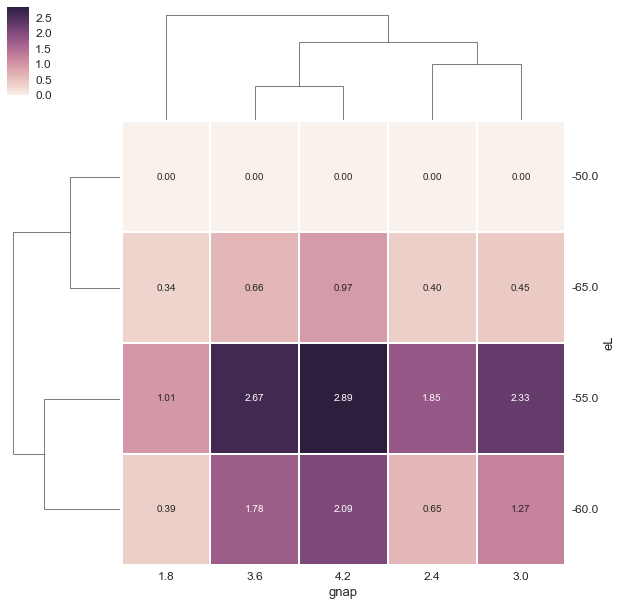

In [23]:
sns.clustermap(unstacked_yan, annot=True, fmt=".2f")
#sns.clustermap(unstacked_tb, annot=True, fmt="f")

## Combine Into One Table

In [62]:
combined_table = pd.concat([table_t,table_y],ignore_index=True)
#combined_table.sort(columns=['eL'],ascending=False)
combined_table.head()

,Burst Duration,Interburst Interval,Total Cycle Time,Peaks per Burst,Intraburst Frequency,Model,eL,gnap
0,5.513902,1.0138,6.527702,179,32.463400,TB,-50.0,1.8
1,2.564601,1.1615,3.726101,65,25.345075,TB,-50.0,1.8
2,2.564801,1.1639,3.728701,65,25.343098,TB,-50.0,1.8
3,2.564801,1.1642,3.729001,65,25.343099,TB,-50.0,1.8
4,2.564801,1.1642,3.729001,65,25.343098,TB,-50.0,1.8


In [64]:
keys = list(combined_table.columns)[0:5]
try: keys.remove("Model")
except: pass
list(enumerate(keys))

[(0, 'Burst Duration'),
 (1, 'Interburst Interval'),
 (2, 'Total Cycle Time'),
 (3, 'Peaks per Burst'),
 (4, 'Intraburst Frequency')]

In [15]:
key = keys[0]

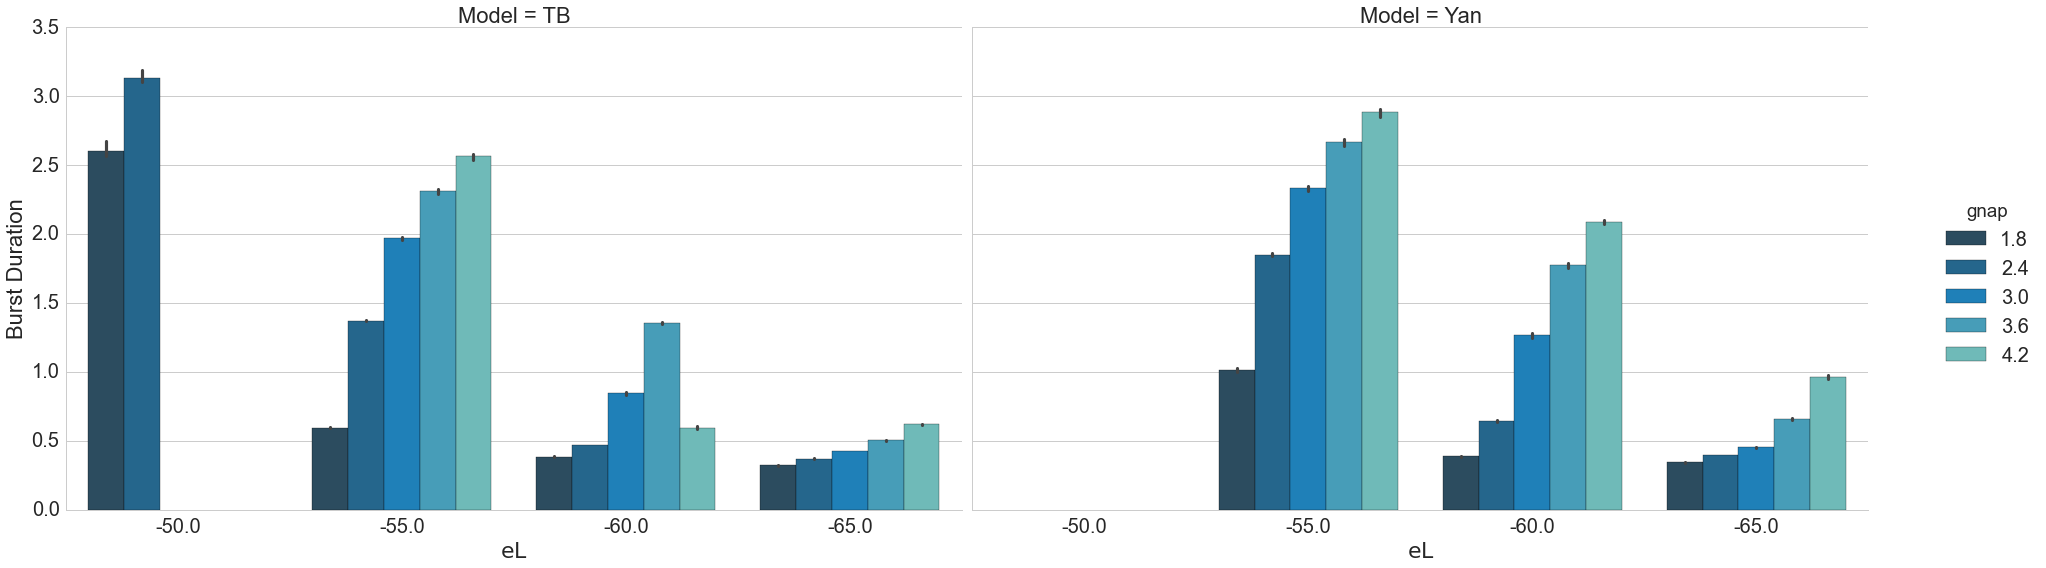

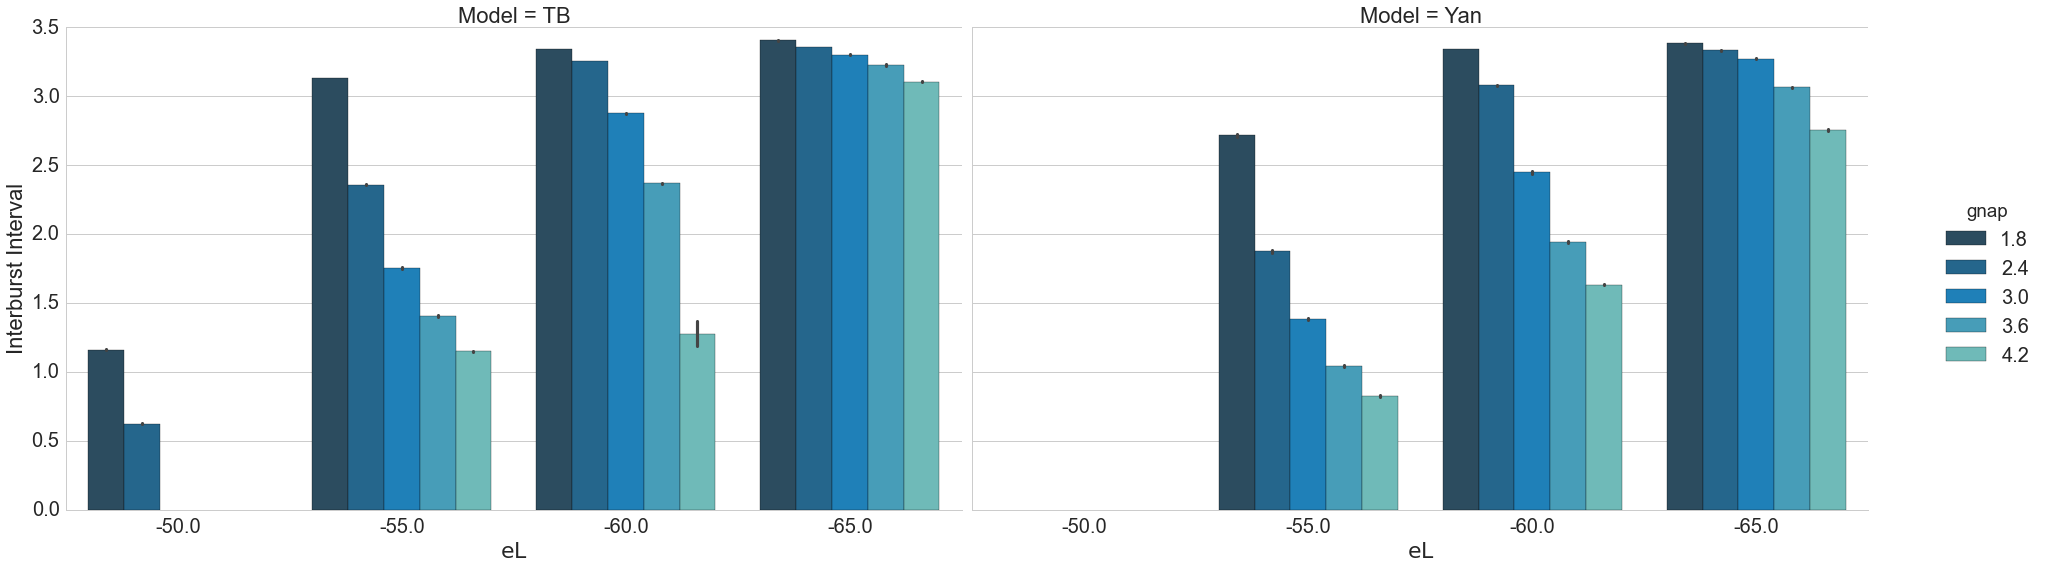

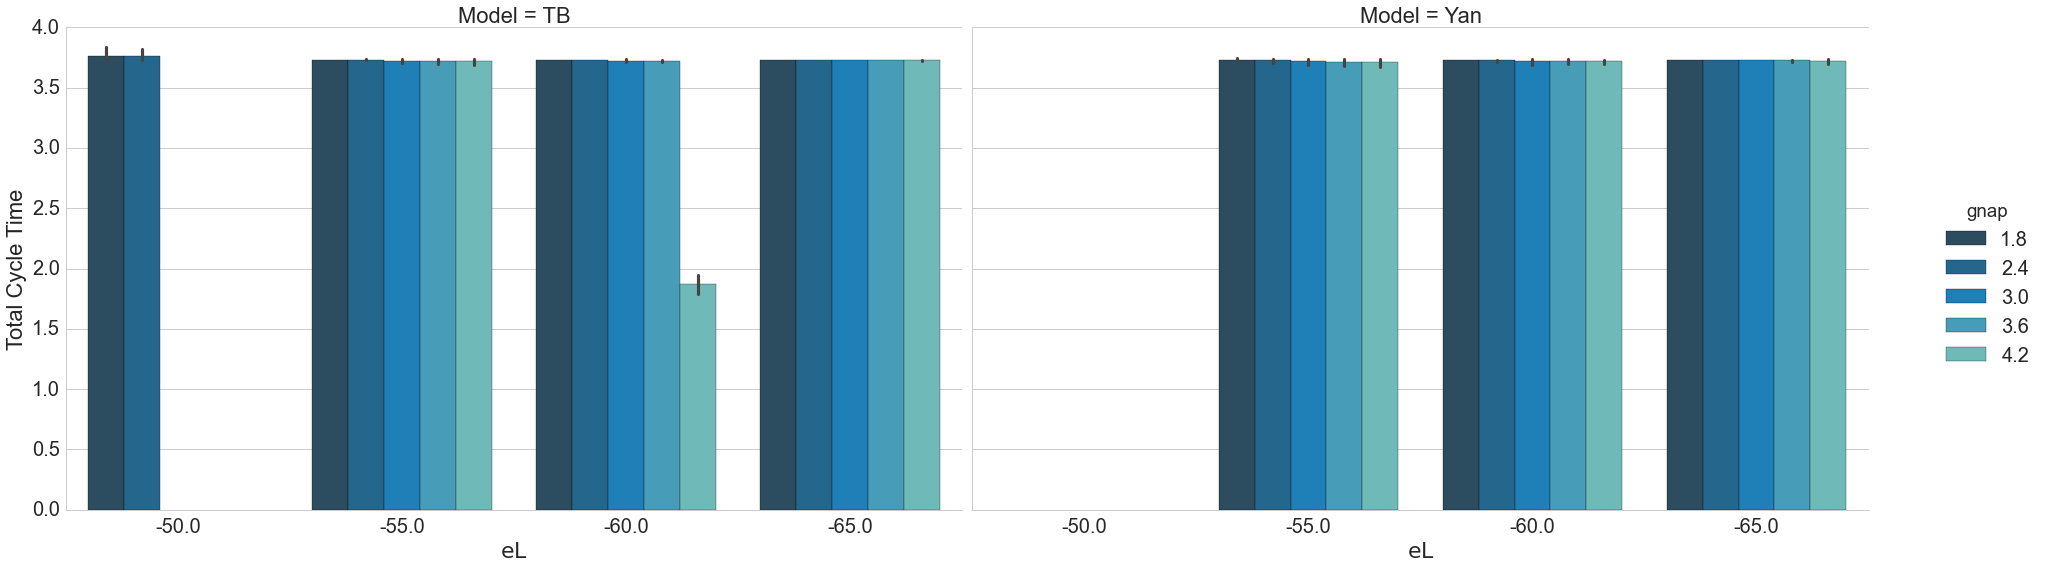

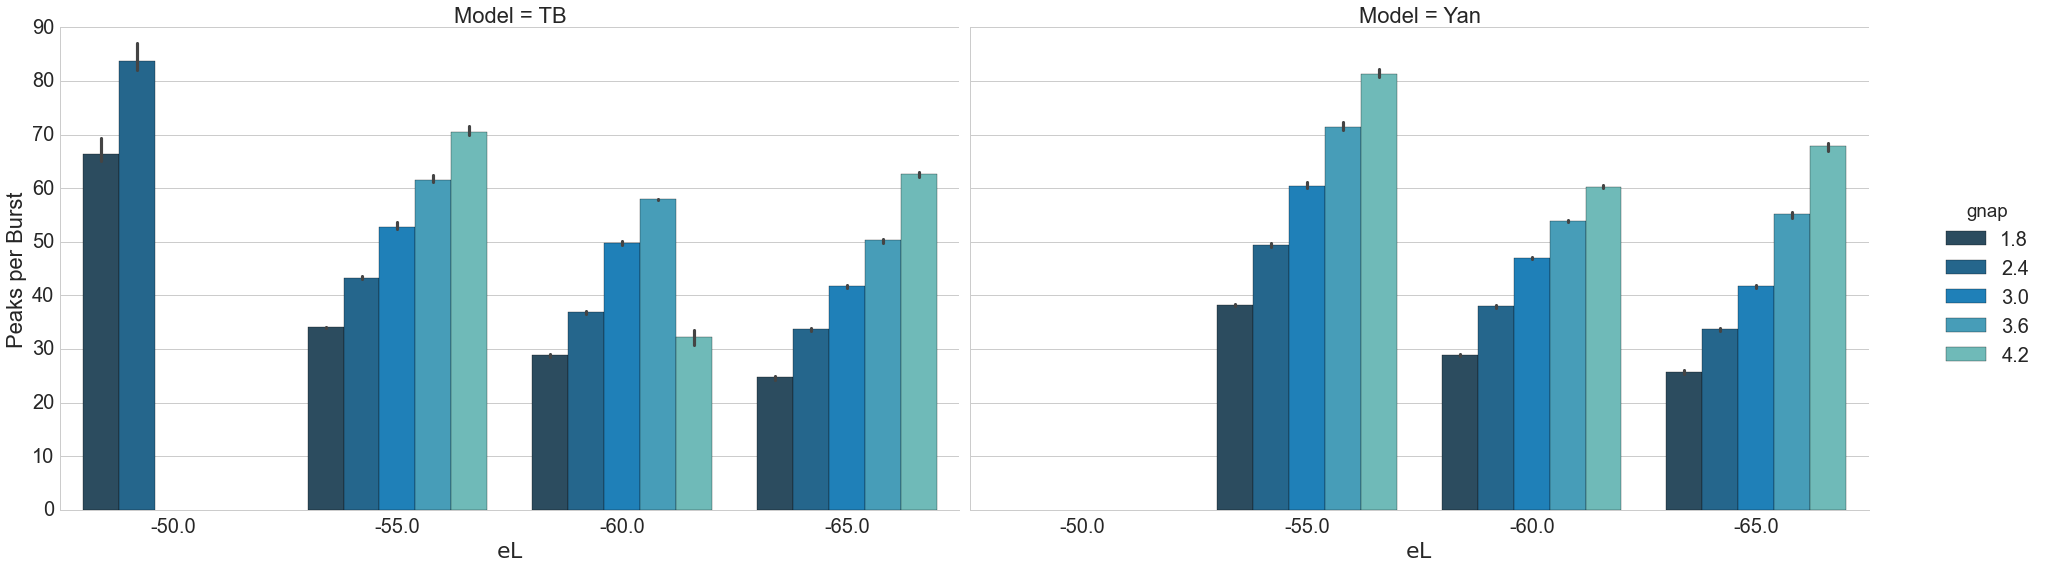

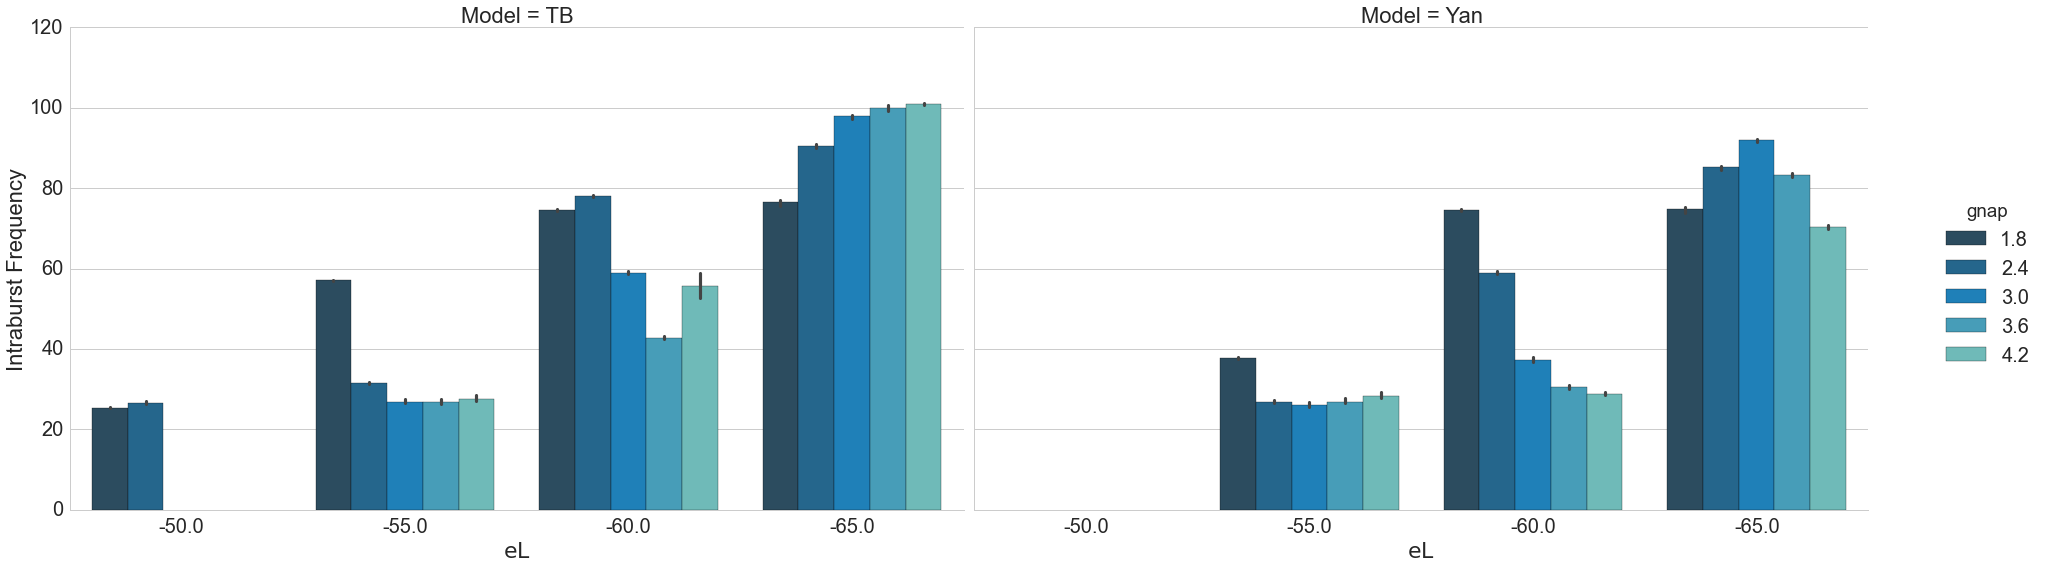

In [31]:
for key in keys[0:5]:
    #ho= ['-65.0','-60.0','-55.0','-50.0']
    sns.set(style="whitegrid",font_scale=2.0)
    facets = sns.factorplot("eL", key, "gnap", combined_table, kind="bar",col="Model", 
                            legend=True,size=8,palette="YlGnBu_d",margin_titles=True, aspect=1.7)
    ax1,ax2 = facets.axes[0]
    ax1.set_xlabel(r'$\mathrm{eL}$')
    ax2.set_xlabel(r'$\mathrm{eL}$')
    barchart_filename = "eL_barchart_{}.pdf".format(key.replace(" ","_"))
    plt.savefig(path.join(plot_dir,barchart_filename))
    plt.show()

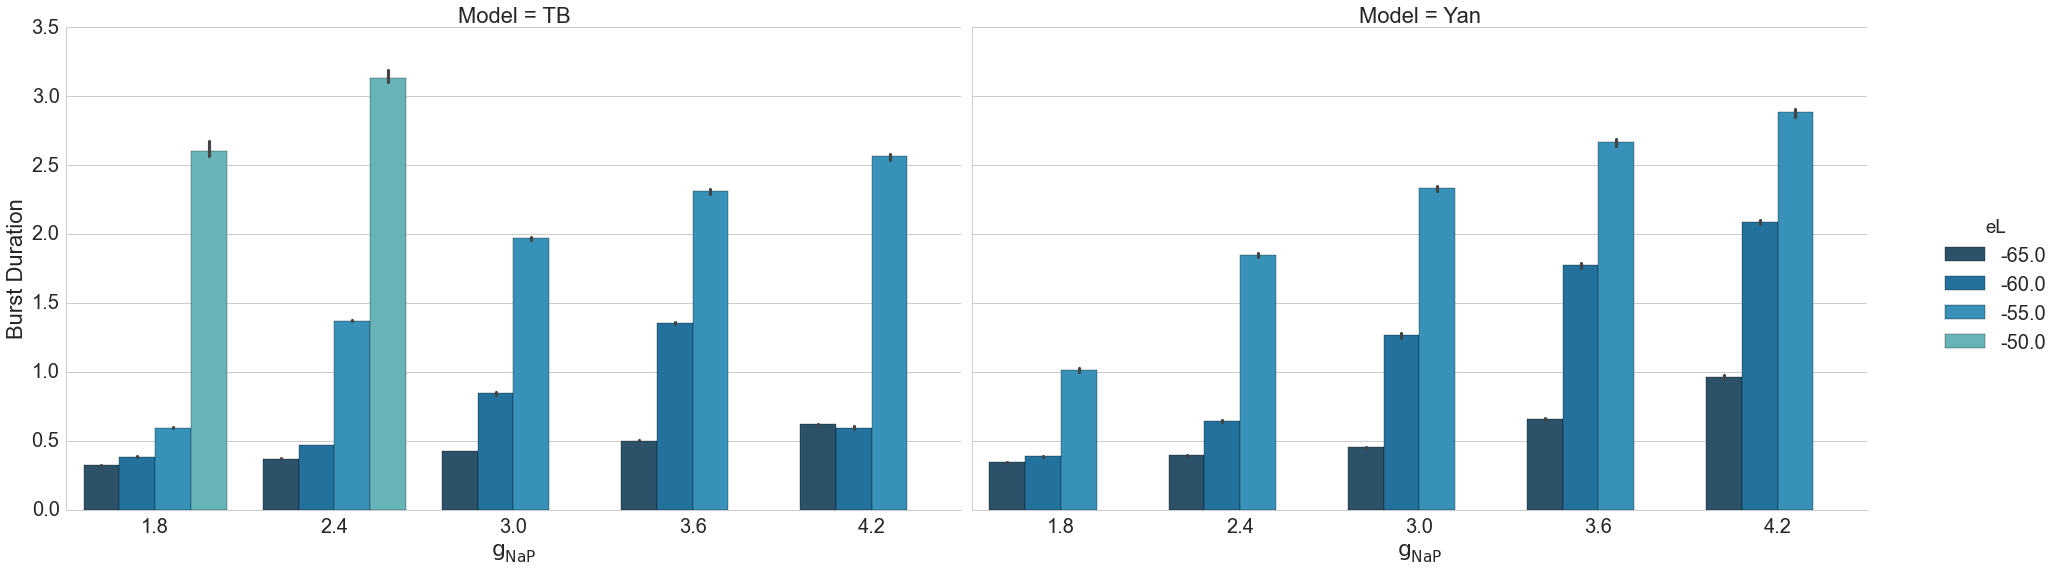

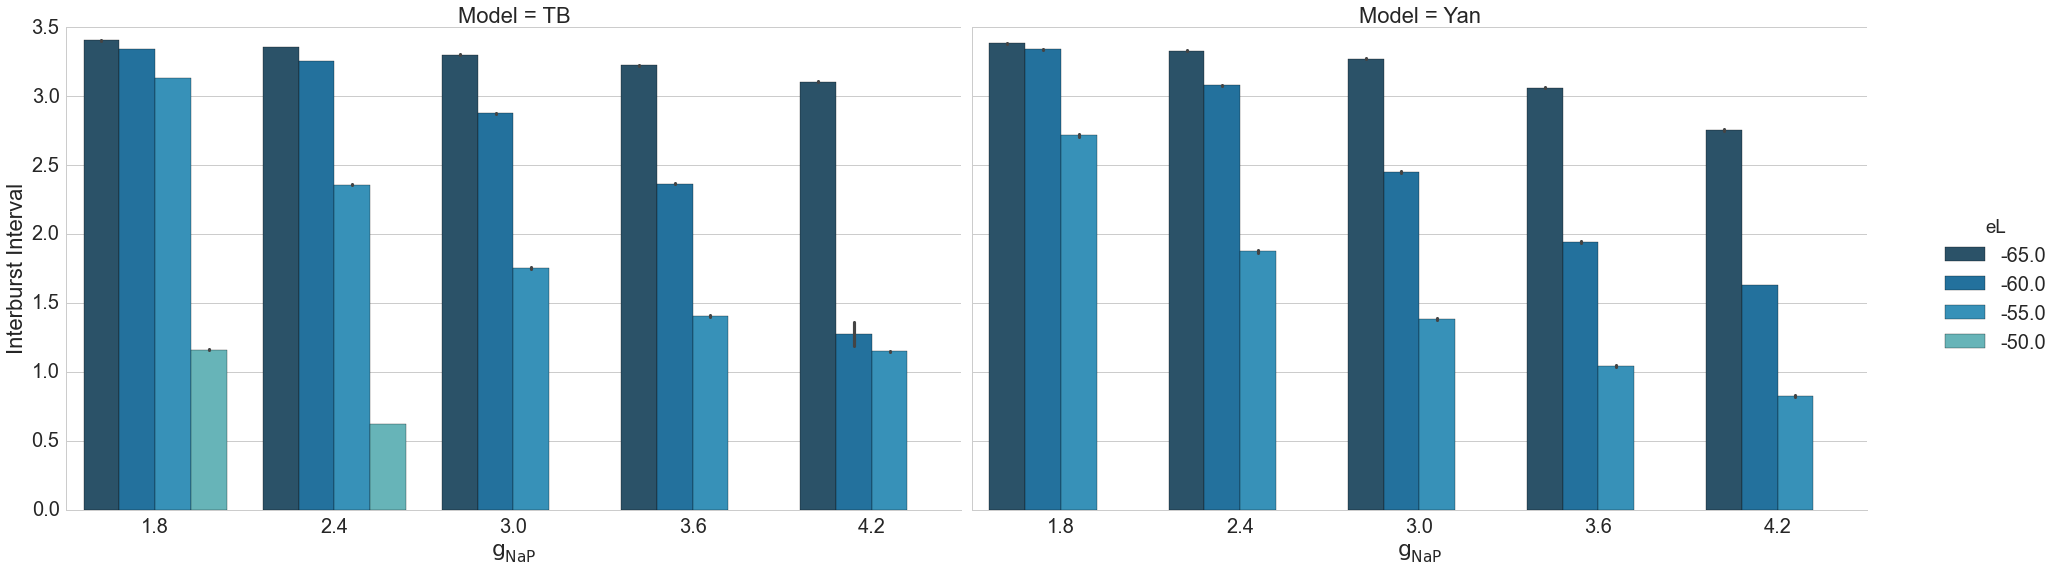

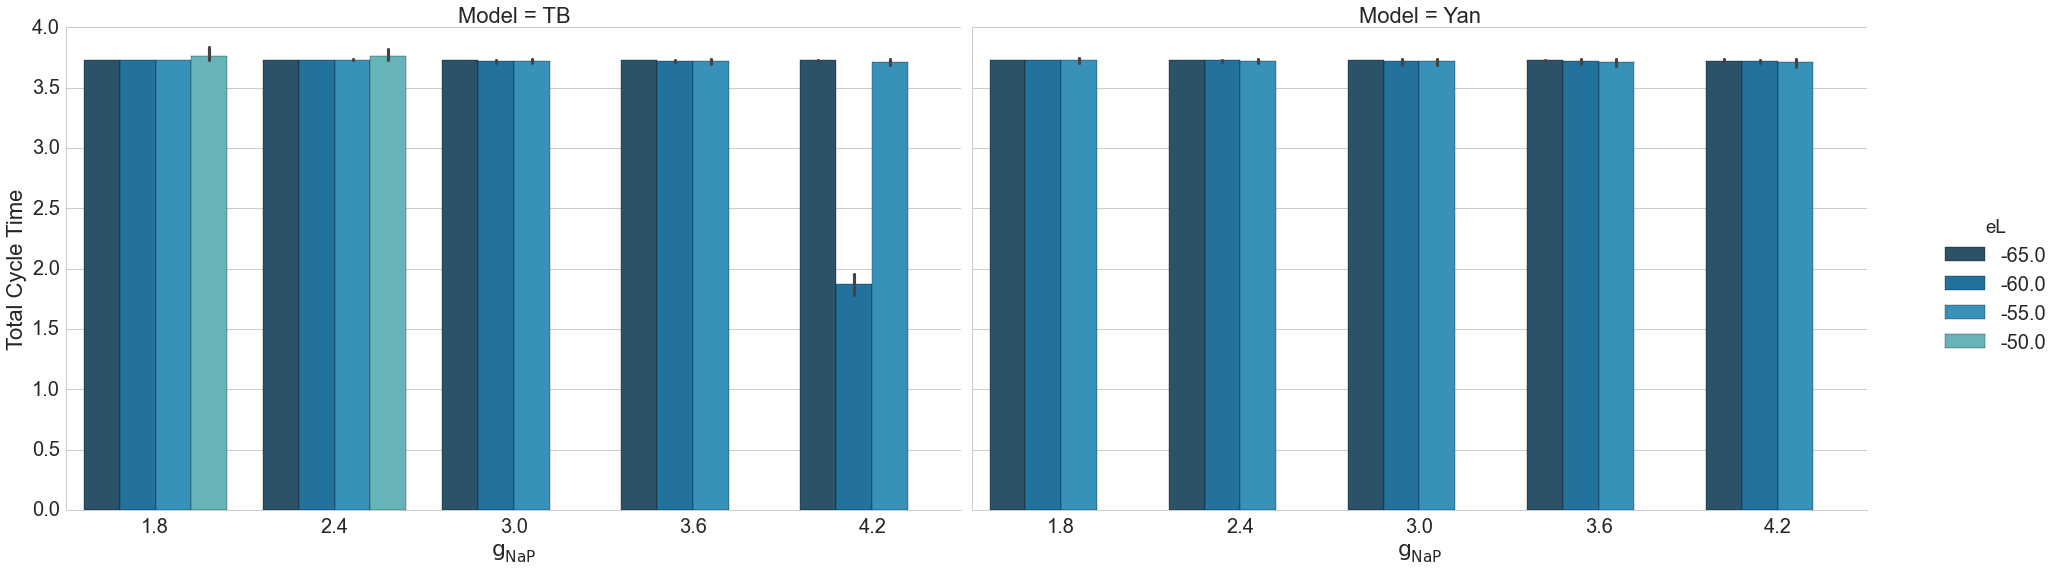

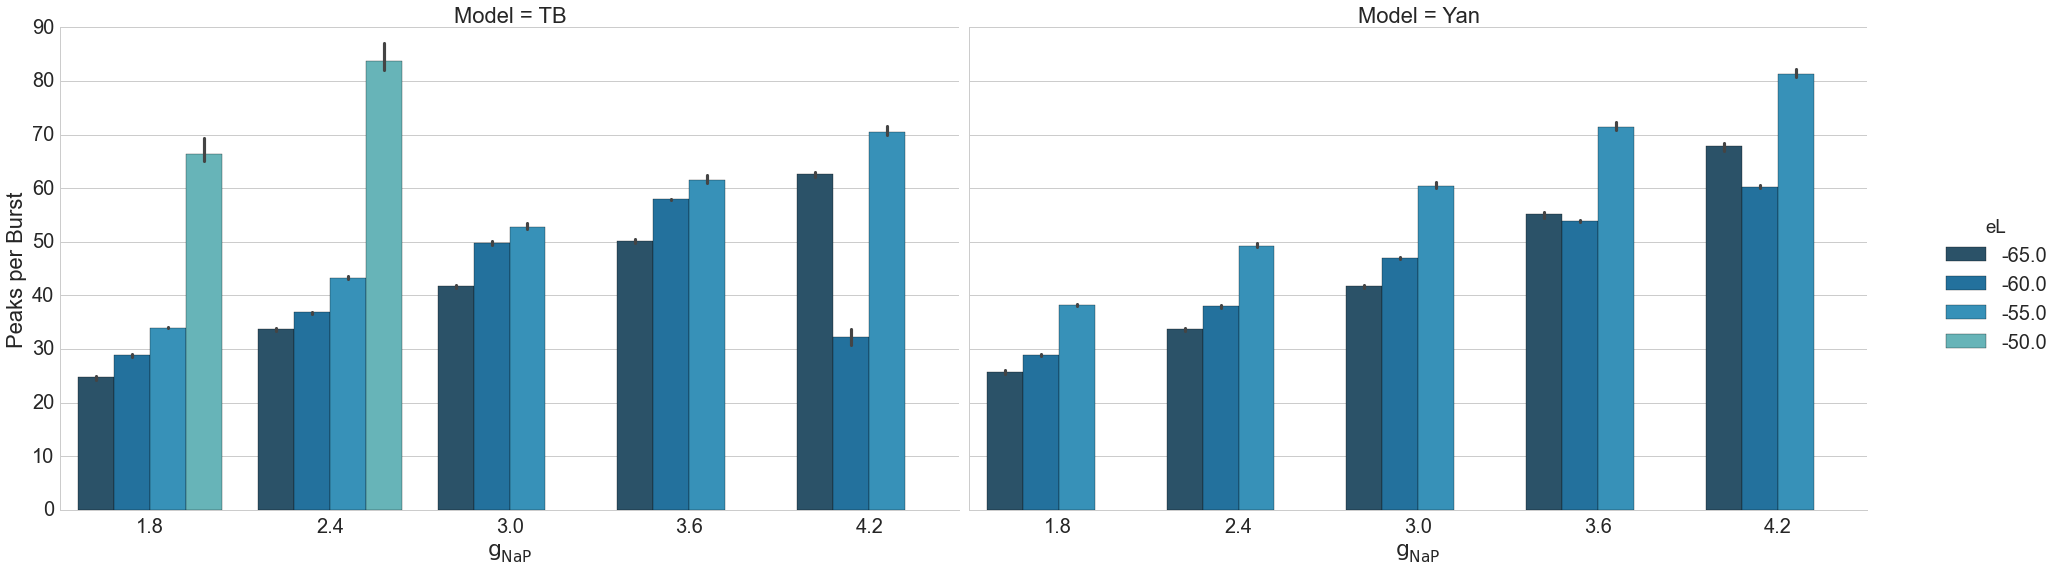

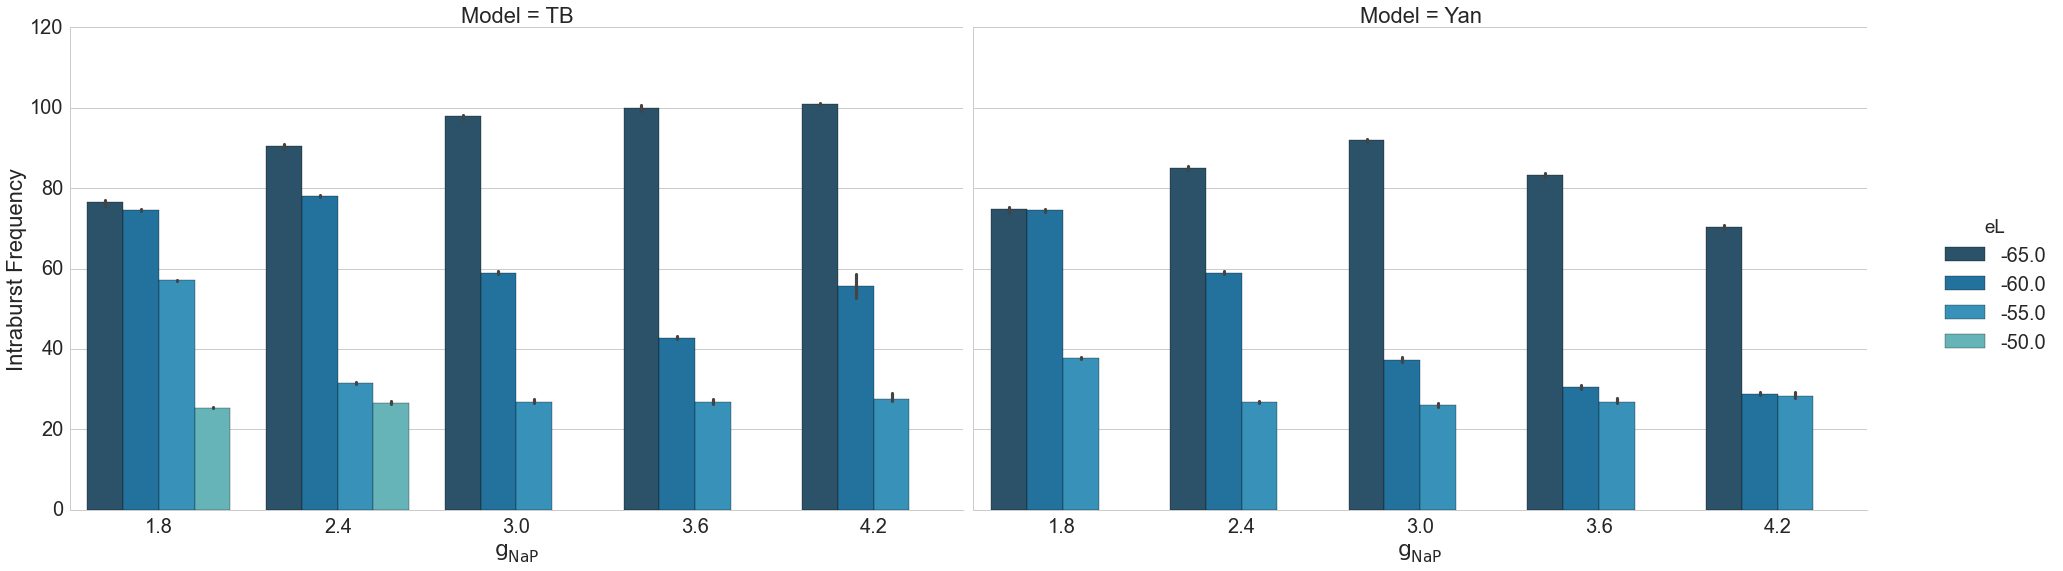

In [30]:
for key in keys[0:5]:
    ho= ['-65.0','-60.0','-55.0','-50.0']
    sns.set(style="whitegrid",font_scale=2.0)
    facets = sns.factorplot("gnap", key, "eL", combined_table, kind="bar",col="Model",hue_order = ho, 
                            legend=True,size=8,palette="YlGnBu_d",margin_titles=True, aspect=1.7)
    ax1,ax2 = facets.axes[0]
    ax1.set_xlabel(r'$\mathrm{g_{NaP}}$')
    ax2.set_xlabel(r'$\mathrm{g_{NaP}}$')
    barchart_filename = "barchart_{}.pdf".format(key.replace(" ","_"))
    plt.savefig(path.join(plot_dir,barchart_filename))
    plt.show()


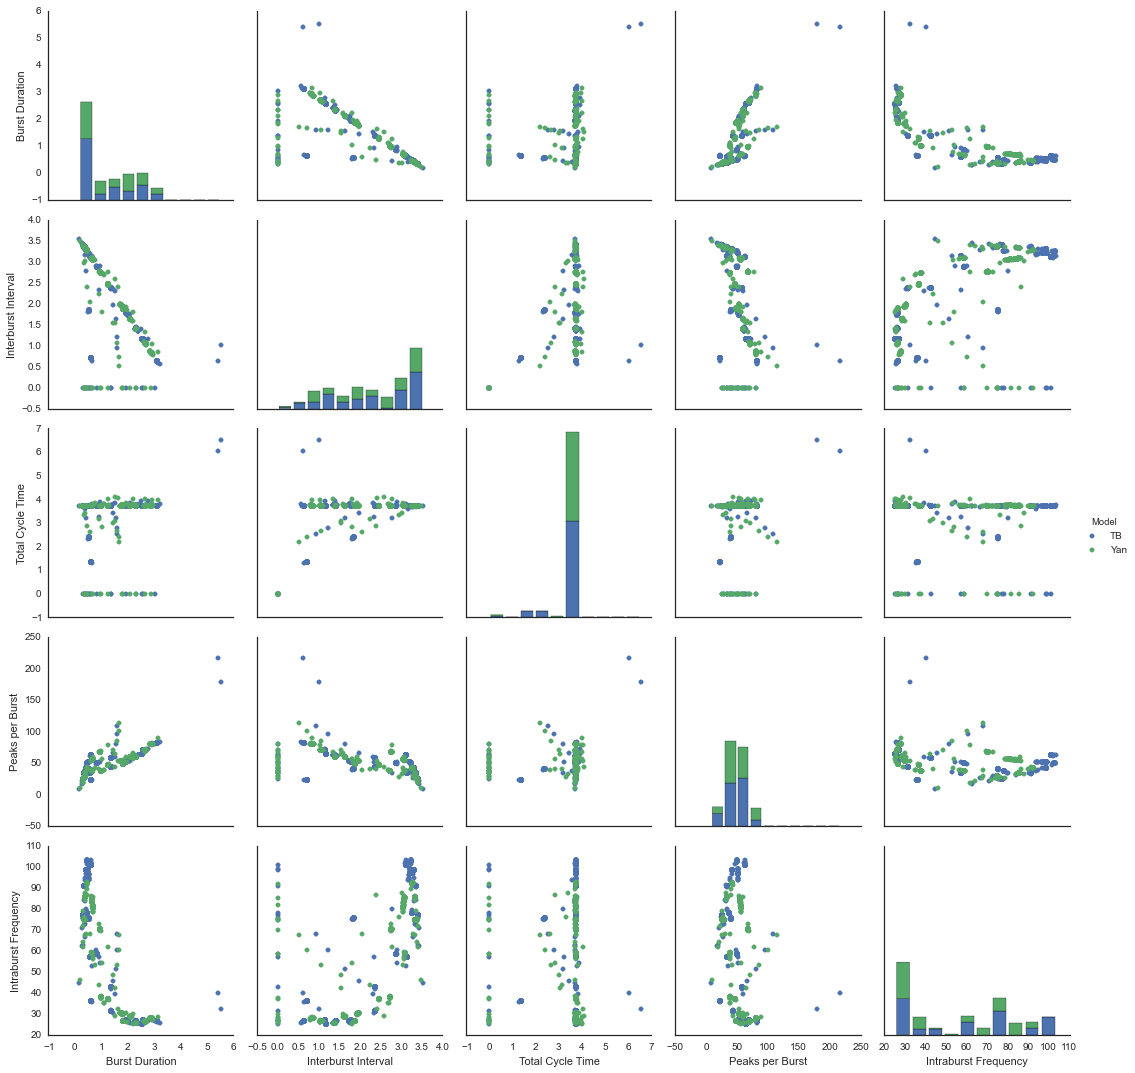

In [14]:
paired_data = combined_table.drop(['eL','gnap'],axis=1).fillna(0)
g = sns.PairGrid(paired_data, hue="Model")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
#g.savefig()

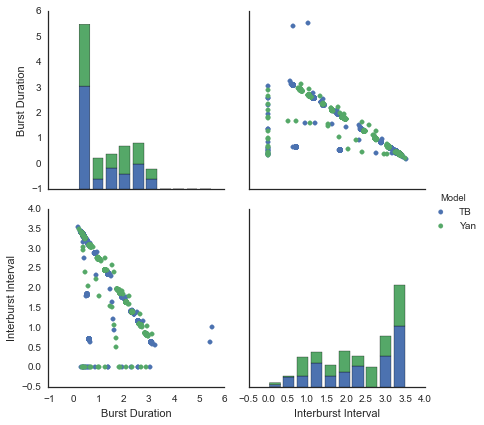

In [17]:
paired_data = combined_table.drop(['eL','gnap'],axis=1).fillna(0)
g = sns.PairGrid(paired_data,vars=["Burst Duration", "Interburst Interval"], hue="Model")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
#g.savefig()

Burst Duration


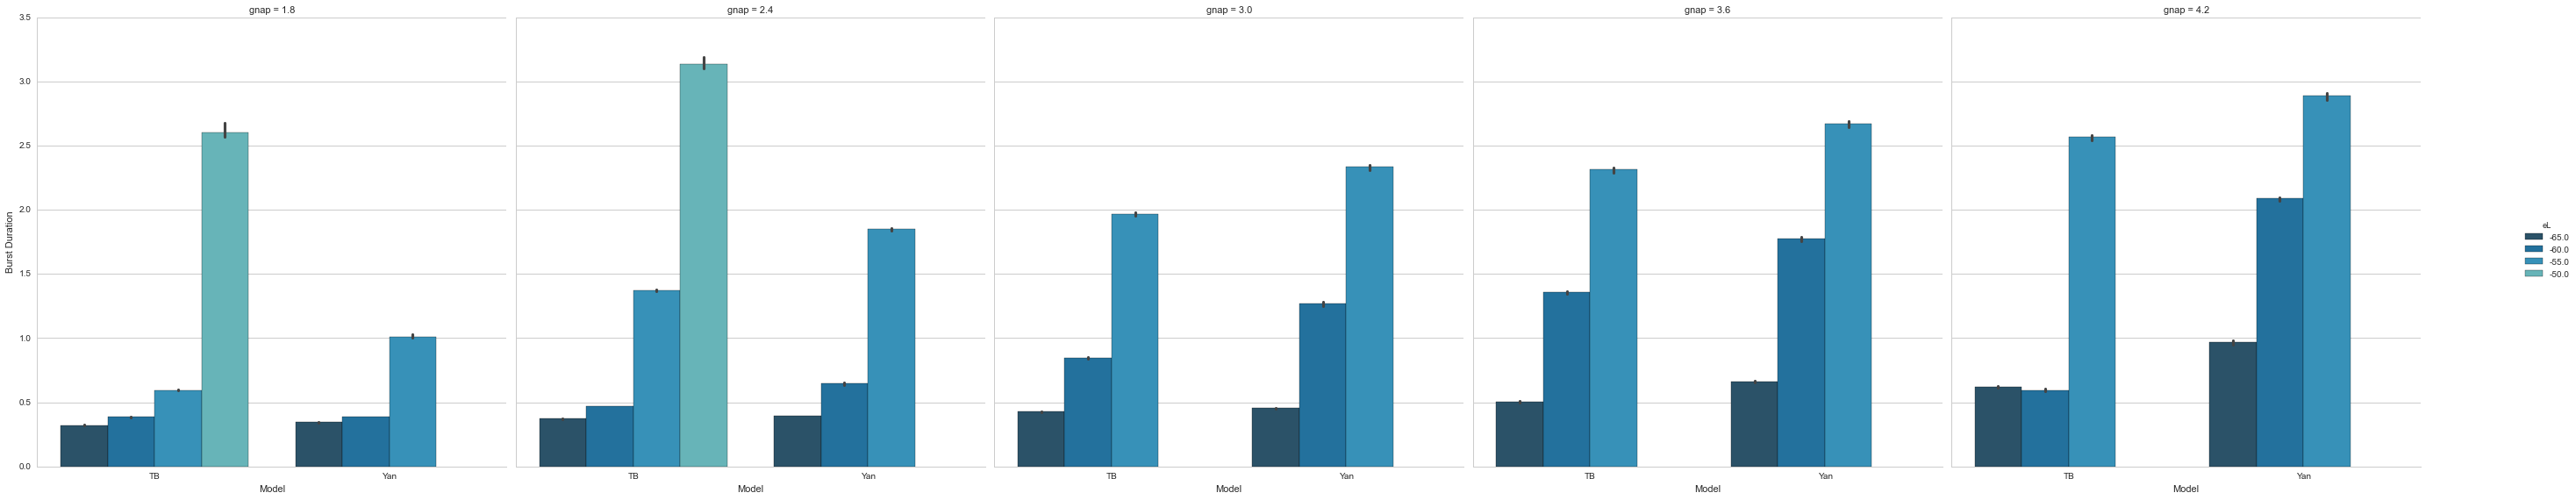

In [83]:
print key
sns.set(style="whitegrid")
facets = sns.factorplot("Model", key, "eL", combined_table, kind="bar",col="gnap",hue_order=['-65.0','-60.0','-55.0','-50.0'],legend=True,size=8,palette="YlGnBu_d",margin_titles=True)#, aspect=.8)

##Mask Table

In [17]:
masked_table = combined_table[combined_table['eL'] != '-50.0']
masked_table.head()

,Burst Duration,Interburst Interval,Total Cycle Time,Peaks per Burst,Intraburst Frequency,Model,eL,gnap
160,0.6619,3.121801,3.783701,35,52.878062,TB,-55.0,1.8
161,0.5949,3.133501,3.728401,34,57.152443,TB,-55.0,1.8
162,0.5951,3.133801,3.728901,34,57.133236,TB,-55.0,1.8
163,0.5951,3.133901,3.729001,34,57.133236,TB,-55.0,1.8
164,0.5951,3.133901,3.729001,34,57.133236,TB,-55.0,1.8


Burst Duration


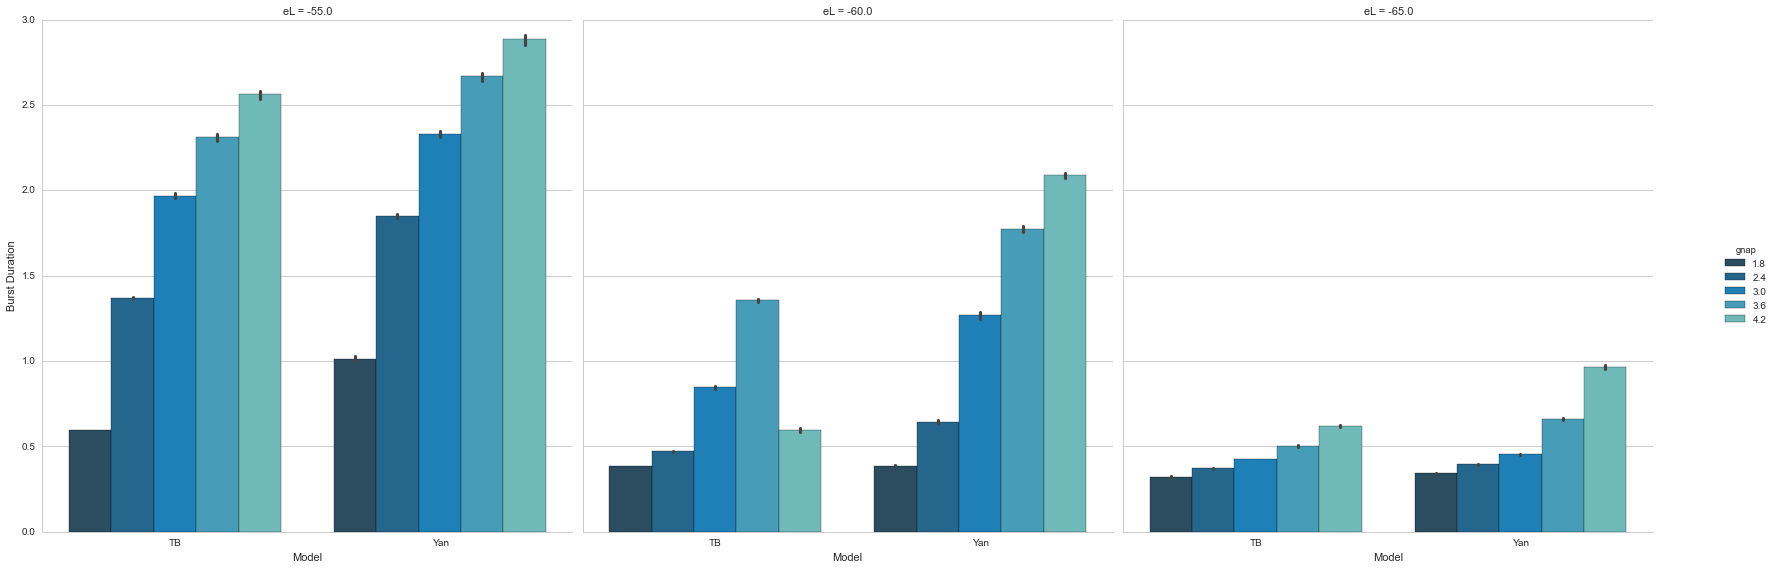

In [18]:
print key
sns.set(style="whitegrid")
facets = sns.factorplot("Model", key, "gnap", masked_table,
                        kind="bar",col="eL",legend=True,size=8,
                        palette="YlGnBu_d",margin_titles=True)#, aspect=.8)
plt.show()

eL


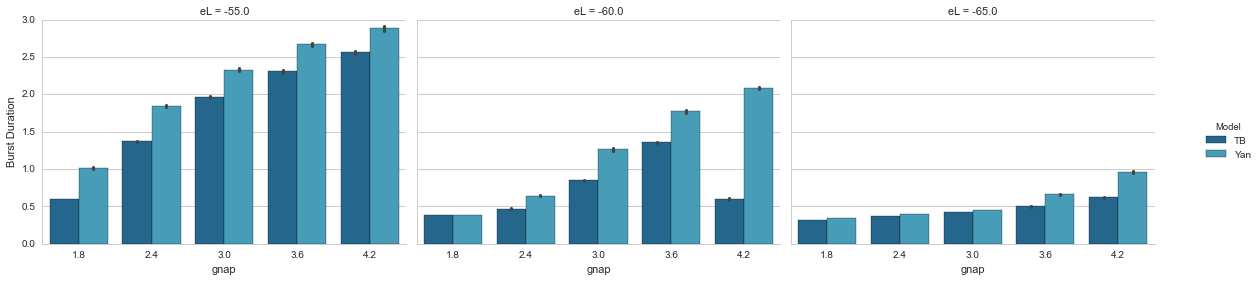

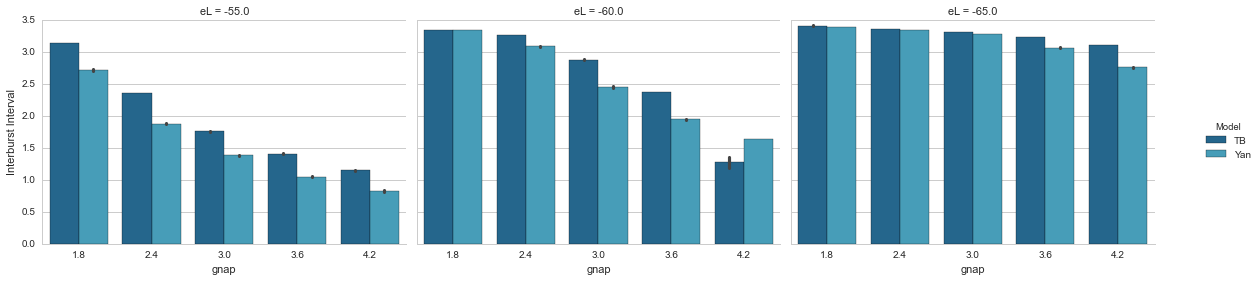

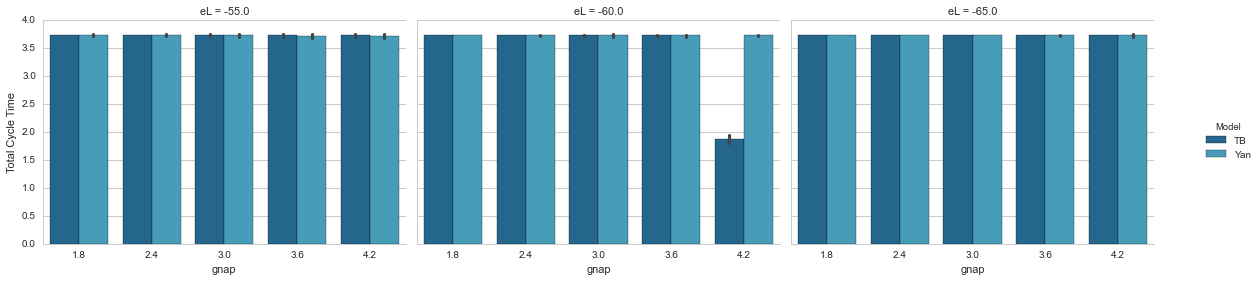

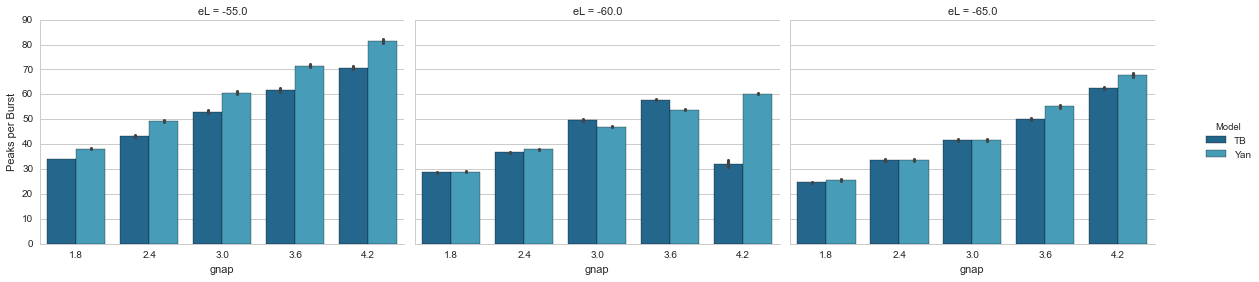

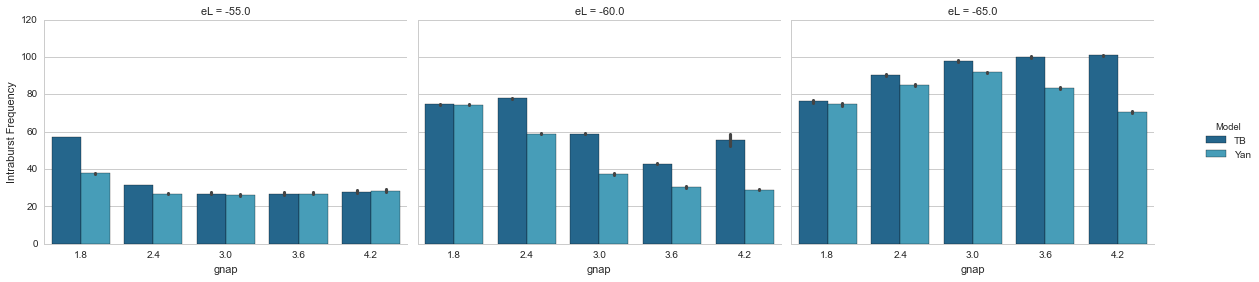

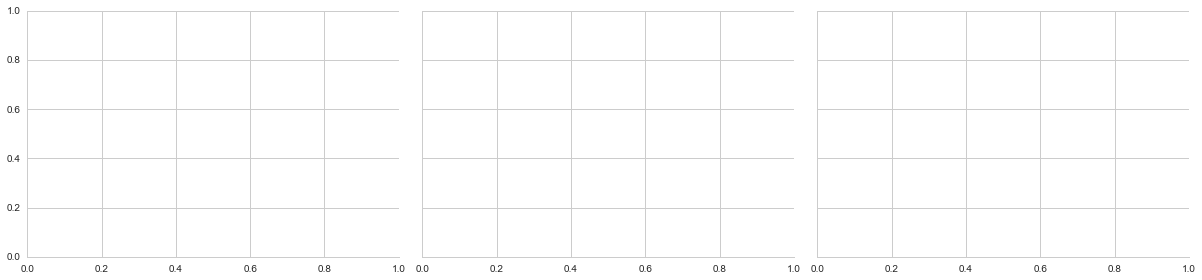

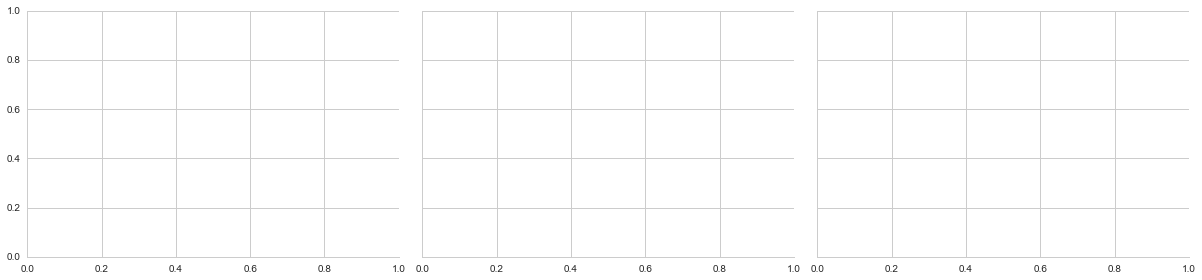

In [23]:
#key = 'Interburst Interval'
#key = 'Burst Duration'
print key
for key in keys[:-2]:
    try:
        sns.set(style="whitegrid")
        sns.set_context(font_scale=4.0)
        facets = sns.factorplot("gnap", key,"Model", masked_table,
                                kind="bar",col="eL",legend=True,size=4,
                                palette="YlGnBu_d",margin_titles=True, aspect=1.4)

        facets.savefig(path.join(plot_dir,"bar_chart_model_comp_{}.pdf".format(key)))
    except:
        pass
plt.show()

In [102]:
sns.set_context??



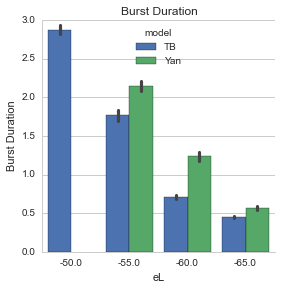

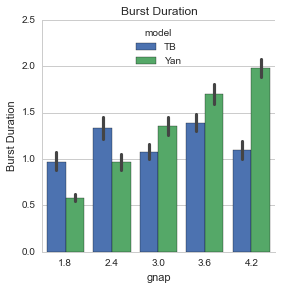

In [46]:
print key
#plotting key against single parameter
facets = sns.factorplot("eL", key, "Model", combined_table, kind="bar",legend=False, size=4)#, aspect=.8)
plt.legend(loc=9,title="model")
plt.title(key)
facets = sns.factorplot("gnap", key, "Model", combined_table, kind="bar",legend=False, size=4)#, aspect=.8)
plt.legend(loc=9,title="model")
plt.title(key)
plt.show()

In [11]:
keys = list(combined_table.columns)
keys.remove("Model")
list(enumerate(keys))

[(0, 'Burst Duration'),
 (1, 'Interburst Interval'),
 (2, 'Total Cycle Time'),
 (3, 'Peaks per Burst'),
 (4, 'Intraburst Frequency'),
 (5, 'eL'),
 (6, 'gnap')]

In [44]:
combined_table.head()

,Burst Duration,Interburst Interval,Total Cycle Time,Peaks per Burst,Intraburst Frequency,Model,eL,gnap
0,5.513902,1.0138,6.527702,179,32.463400,TB,-50.0,1.8
1,2.564601,1.1615,3.726101,65,25.345075,TB,-50.0,1.8
2,2.564801,1.1639,3.728701,65,25.343098,TB,-50.0,1.8
3,2.564801,1.1642,3.729001,65,25.343099,TB,-50.0,1.8
4,2.564801,1.1642,3.729001,65,25.343098,TB,-50.0,1.8


In [19]:
grouped = combined_table.groupby(['Model','eL','gnap'])
mean_grouped = grouped.mean()
mean_grouped.head()

Burst Duration  Interburst Interval  Total Cycle Time  \
Model eL    gnap                                                          
TB    -50.0 1.8         2.601640             1.162299          3.764405   
            2.4         3.132642             0.624704          3.758633   
      -55.0 1.8         0.595964             3.133716          3.729691   
            2.4         1.371234             2.359611          3.730877   
            3.0         1.969662             1.754134          3.724225   

                  Peaks per Burst  Intraburst Frequency  
Model eL    gnap                                         
TB    -50.0 1.8         66.425000             25.432349  
            2.4         83.687500             26.590743  
      -55.0 1.8         34.012346             57.076911  
            2.4         43.222222             31.510598  
            3.0         52.839506             26.896876

AttributeError: 'Line2D' object has no attribute 'color'

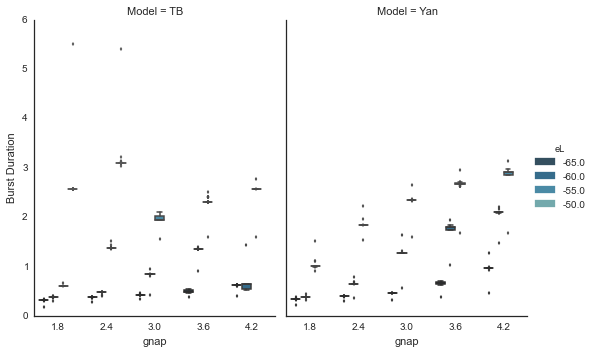

In [66]:
box_plot = sns.factorplot("gnap", "Burst Duration", "eL", combined_table, col="Model",
               palette="YlGnBu_d", aspect=.75,kind='box',hue_order= ['-65.0','-60.0','-55.0','-50.0'])

axes = box_plot.axes.tolist()[0] #array of the axes
ax1,ax2 = axes
#ax1.set(linewidth=0)
for i in ax1.lines:
    i.color
    ax1.ge
    plt.setp(i)#, color=) 


In [49]:
sns.factorplot??

Object `ax.boxplot` not found.
{'boxes': [<matplotlib.lines.Line2D object at 0x10a2bc4d0>, <matplotlib.lines.Line2D object at 0x10aa11710>, <matplotlib.lines.Line2D object at 0x10adc9950>, <matplotlib.lines.Line2D object at 0x10db71890>, <matplotlib.lines.Line2D object at 0x10a115bd0>, <matplotlib.lines.Line2D object at 0x10d664c50>, <matplotlib.lines.Line2D object at 0x10d494590>, <matplotlib.lines.Line2D object at 0x10f4b97d0>, <matplotlib.lines.Line2D object at 0x10aca5690>, <matplotlib.lines.Line2D object at 0x10db7f590>], 'fliers': [<matplotlib.lines.Line2D object at 0x10b6e77d0>, <matplotlib.lines.Line2D object at 0x10adc9cd0>, <matplotlib.lines.Line2D object at 0x10acd7b50>, <matplotlib.lines.Line2D object at 0x10dd7b7d0>, <matplotlib.lines.Line2D object at 0x109c79250>, <matplotlib.lines.Line2D object at 0x10d494890>, <matplotlib.lines.Line2D object at 0x10f4ab4d0>, <matplotlib.lines.Line2D object at 0x10bab87d0>, <matplotlib.lines.Line2D object at 0x10d4e9a90>, <matplotlib.lin

{'boxes': [<matplotlib.lines.Line2D at 0x10a2bc4d0>,
 'caps': [<matplotlib.lines.Line2D at 0x10a2b4250>,
 'fliers': [<matplotlib.lines.Line2D at 0x10b6e77d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10b6e7f50>,
 'whiskers': [<matplotlib.lines.Line2D at 0x10a2bc050>,
  <matplotlib.lines.Line2D at 0x10bb5c6d0>]}

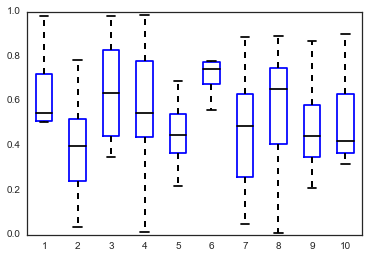

In [51]:
import numpy as np
pl.boxplot??
data = np.random.random((10,10))
r = plt.boxplot(data) 
r.keys() 
print r, r.keys()
plt.setp(r['medians'], color='black') 
plt.setp(r['whiskers'], color='black', lw=2) 
r

#Peaks

In [156]:
peaks = pd.DataFrame.from_csv("/Users/morganfine-morris/Documents/Repos/NMProject/"
                              "Paper/Data and Analysis/long TB Yan/peaks.csv")

grouped_peaks = peaks.groupby('Model')
peaks_d = {"tb":grouped_peaks.get_group("tb"), "yan":grouped_peaks.get_group("yan")}

masked_table = peaks[peaks['eL'] != -50.0]
print masked_table.head(3)

keys = peaks.columns.values[0:3]
list(enumerate(keys))

          Time  Peaks Amplitude  Intervals Model  eL  gnaps
108674  0.9483         5.662757     0.0800    tb -55    1.8
108675  1.0283         5.638986     0.0601    tb -55    1.8
108676  1.0884         5.647143     0.0446    tb -55    1.8


[(0, 'Time'), (1, 'Peaks Amplitude'), (2, 'Intervals')]

In [178]:
key = keys[2]
key

'Intervals'

     Time  Peaks Amplitude  Intervals Model  eL  gnaps
0  0.0319         5.846378     0.0162    tb -50    1.8
1  0.0481         5.667075     0.0163    tb -50    1.8
2  0.0644         5.622115     0.0164    tb -50    1.8
3  0.0808         5.674220     0.0166    tb -50    1.8
4  0.0974         5.538182     0.0167    tb -50    1.8
     Time  Peaks Amplitude  Intervals Model  eL  gnaps
0  0.0319         5.846378     0.0162    tb -50    1.8
1  0.0481         5.667075     0.0163    tb -50    1.8
2  0.0644         5.622115     0.0164    tb -50    1.8
3  0.0808         5.674220     0.0166    tb -50    1.8
4  0.0974         5.538182     0.0167    tb -50    1.8


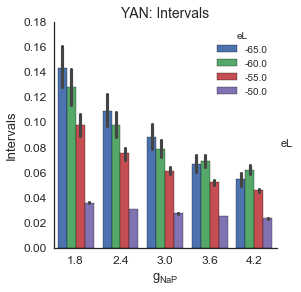

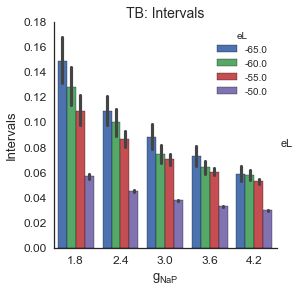

In [158]:
#plot for peaks
for model, peaks_df in peaks_d.iteritems():
    print peaks.head()
    ho= [-65.0,-60.0,-55.0,-50.0]
    facets = sns.factorplot("gnaps", key, "eL", peaks_df, kind="bar",legend=True, legend_out=True, 
                            size=4, hue_order = ho)#, aspect=.8)
    plt.legend(loc=1,title="eL")
    plt.xlabel(r'$g_{NaP}$')
    plt.title(model.upper()+": "+key)

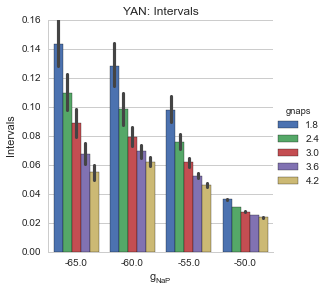

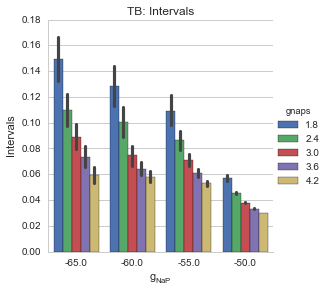

In [179]:
#plot for peaks
for model, peaks_df in peaks_d.iteritems():
    facets = sns.factorplot("eL", key, "gnaps", peaks_df, kind="bar",legend=True, legend_out=True, 
                            size=4)#, aspect=.8)
    #plt.legend(loc=1,title="gnaps")
    plt.xlabel(r'$g_{NaP}$')
    plt.title(model.upper()+": "+key)

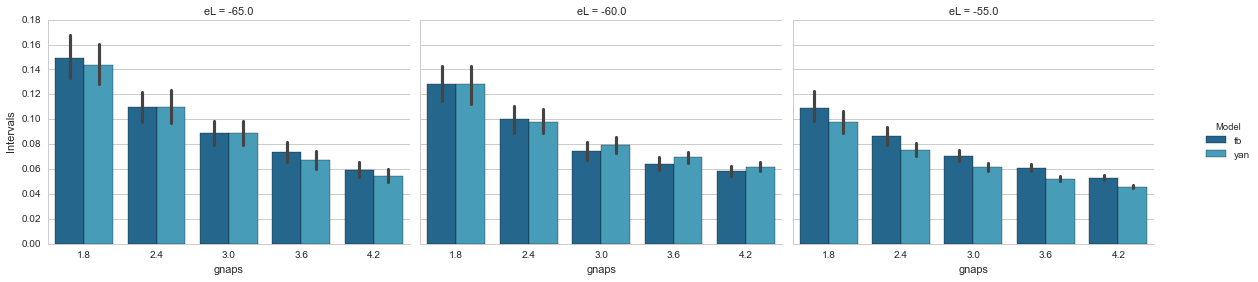

In [180]:
sns.set(style="whitegrid")
sns.set_context(font_scale=4.0)

facets = sns.factorplot("gnaps", key,"Model", masked_table,
                        kind="bar",col="eL",legend=True,size=4,
                        palette="YlGnBu_d",margin_titles=True, aspect=1.4)
#facets.savefig(path.join(plot_dir,"bar_chart_model_comp_{}.pdf".format(key)))

#plt.show()

# Pair plotting

From http://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot

In [175]:
iris = sns.load_dataset("iris")
iris.iloc[0:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


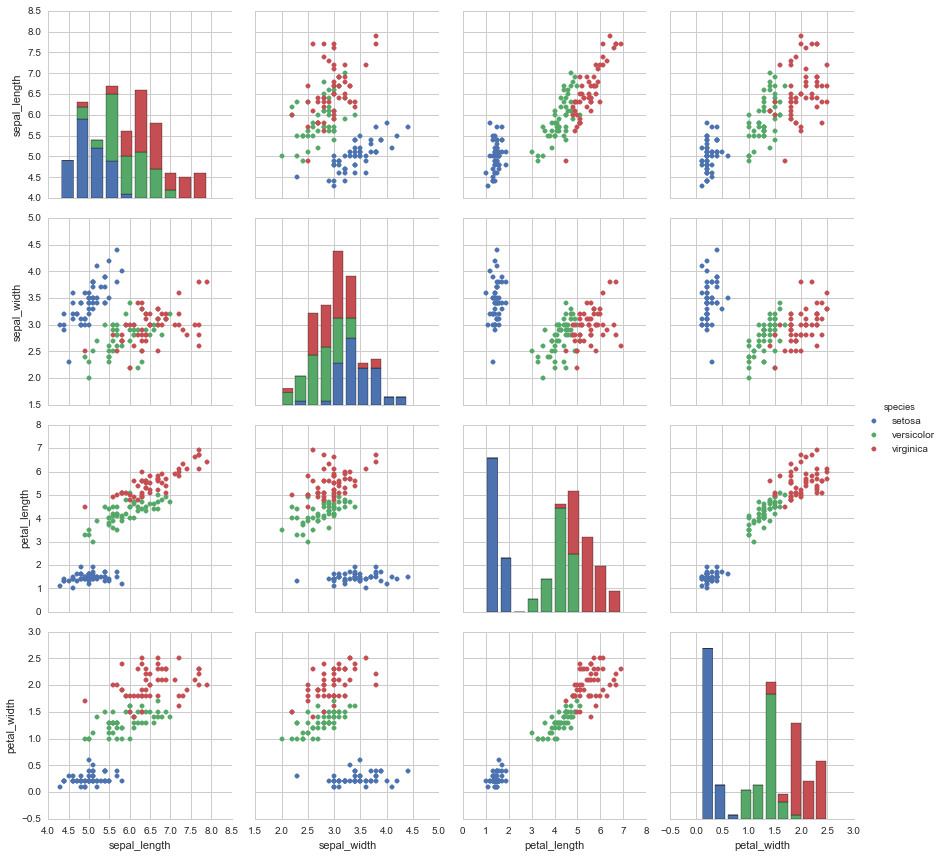

In [169]:
g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

In [208]:
g.map_diag??

In [179]:
new_table = combined_table.drop(labels=['Total Cycle Time','Peaks per Burst','Intraburst Frequency'],axis=1)
new_table.iloc[0:5]

,Burst Duration,Interburst Interval,Model,eL,gnap
0,5.513902,1.0138,TB,-50.0,1.8
1,2.564601,1.1615,TB,-50.0,1.8
2,2.564801,1.1639,TB,-50.0,1.8
3,2.564801,1.1642,TB,-50.0,1.8
4,2.564801,1.1642,TB,-50.0,1.8


In [206]:
grouped = new_table.groupby(by=['Model','eL','gnap'])
mean_grouped = grouped.mean()
mean_grouped

Burst Duration  Interburst Interval
Model eL    gnap                                     
TB    -50.0 1.8         2.601640             1.162299
            2.4         3.132642             0.624704
      -55.0 1.8         0.595964             3.133716
            2.4         1.371234             2.359611
            3.0         1.969662             1.754134
            3.6         2.312682             1.406959
            4.2         2.567071             1.149653
      -60.0 1.8         0.385950             3.342855
            2.4         0.472020             3.255766
            3.0         0.847578             2.876171
            3.6         1.356419             2.367033
            4.2         0.595734             1.274160
      -65.0 1.8         0.322595             3.406132
            2.4         0.372017             3.356780
            3.0         0.426287             3.302461
            3.6         0.502790             3.225711
            4.2         0.620868             3.105877
Yan   -55.0 1.8         1.011908             2.715760
            2.4         1.848286             1.876744
            3.0         2.332272             1.387140
            3.6         2.669849             1.045905
            4.2         2.887633             0.825758
      -60.0 1.8         0.387687             3.340912
            2.4         0.645440             3.080207
            3.0         1.268767             2.450862
            3.6         1.776314             1.943853
            4.2         2.088798             1.632268
      -65.0 1.8         0.344249             3.384449
            2.4         0.396545             3.332157
            3.0         0.454562             3.273519
            3.6         0.662073             3.063681
            4.2         0.966225             2.755195

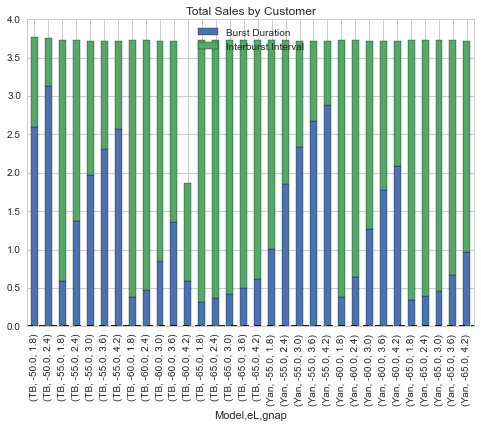

In [215]:
mean_grouped.plot(kind='bar', stacked=True,title="Total Sales by Customer")

TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed

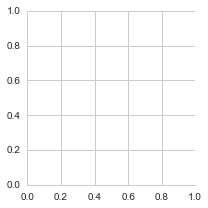

In [217]:
grid = sns.FacetGrid(mean_grouped)
grid.map(plt.hist, ['gnap','eL','Model'], kwargs = {stacked:"barstacked"})#mean_grouped.plot(kind='bar',stacked=True,title="Total Sales by Customer"))

# Junk

In [ ]:
#for an aborted attempt at stacked, grouped barcharts based on example at #http://randyzwitch.com/creating-stacked-bar-chart-seaborn/
stacked = pd.DataFrame(combined_table[:-1]) #last row has some NaN vals, so drop it.
stacked['Total'] = stacked['Interburst Interval'] + stacked['Burst Duration']
stacked[0:5]

In [ ]:
'''
#not necessary any more
table_t['Model'] = 'TB'
table_t['Parameter Set'] = table_t.index
table_y['Model'] = 'Yan'
table_y['Parameter Set'] = table_y.index
'''